## 以下資料來自Kaggle中的Social Media Addiction Among Students Dataset，並參考公開的code資源

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [38]:
sns.set_style("whitegrid") #設定圖表為白色背景，灰色的格線

In [39]:
df = pd.read_csv('Students Social Media Addiction.csv')

In [40]:
print(df.head()) #查看前幾行

   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score Relationship_Status  Conflicts_Over_Soc

In [41]:
print(df.describe()) #確認無資料缺失，以及基礎的資料分析

       Student_ID         Age  Avg_Daily_Usage_Hours  Sleep_Hours_Per_Night  \
count  705.000000  705.000000             705.000000             705.000000   
mean   353.000000   20.659574               4.918723               6.868936   
std    203.660256    1.399217               1.257395               1.126848   
min      1.000000   18.000000               1.500000               3.800000   
25%    177.000000   19.000000               4.100000               6.000000   
50%    353.000000   21.000000               4.800000               6.900000   
75%    529.000000   22.000000               5.800000               7.700000   
max    705.000000   24.000000               8.500000               9.600000   

       Mental_Health_Score  Conflicts_Over_Social_Media  Addicted_Score  
count           705.000000                   705.000000      705.000000  
mean              6.226950                     2.849645        6.436879  
std               1.105055                     0.957968        1.5

## Exploratory Data Analyse

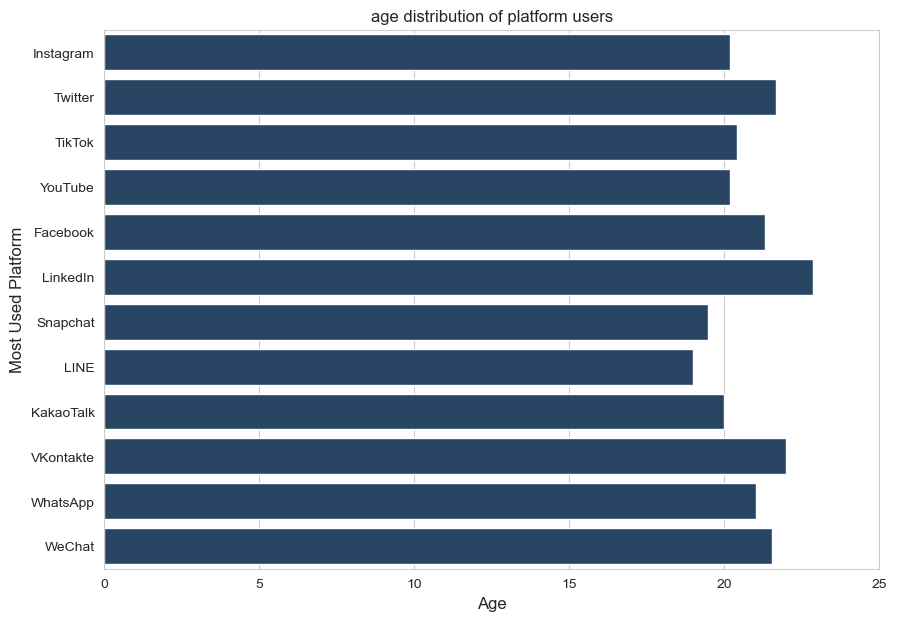

In [61]:
#先將這些學生使用不同平台的年齡做初步的分類
plt.figure(figsize=(10, 7))# 設定圖表大小
sns.barplot(x='Age', y='Most_Used_Platform', data=df, errorbar=None, color='#1F456E')
plt.title('age distribution of platform users') # 設定圖表標題
plt.xlabel('Age', fontsize=12) # 設定X軸標籤
plt.ylabel('Most Used Platform', fontsize=12) # 設定Y軸標籤
plt.xticks(np.arange(0, 30, 5))#由0-30，間格為5
plt.show() # 顯示圖表 

Academic_Level
Undergraduate    353
Graduate         325
High School       27
Name: count, dtype: int64


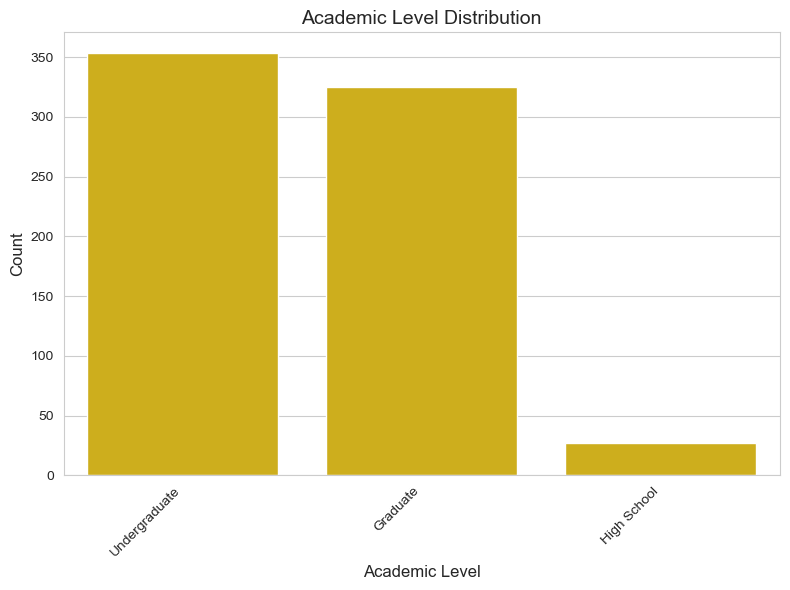

In [59]:
# 為了要繪製單一類別的計數長條圖，先手動算出
academic_counts = df['Academic_Level'].value_counts() #計算academic level中的每個教育程度類別次數
print(academic_counts)


plt.figure(figsize=(8, 6)) 
# 正確的 sns.barplot 傳入方式
# 直接使用 Series 的 index（教育程度） 作為 x 軸，values 作為 y 軸
sns.barplot(x=academic_counts.index, y=academic_counts.values, color='#EAC100')

plt.title('Academic Level Distribution', fontsize=14) # 設定圖表標題
plt.xlabel('Academic Level', fontsize=12) # 設定X軸標籤
plt.ylabel('Count', fontsize=12) # 設定Y軸標籤

# 如果 Academic Level 標籤過長，可以考慮旋轉，但這邊沒有用到
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # 確保所有元素都顯示完整
plt.show() # 顯示圖表

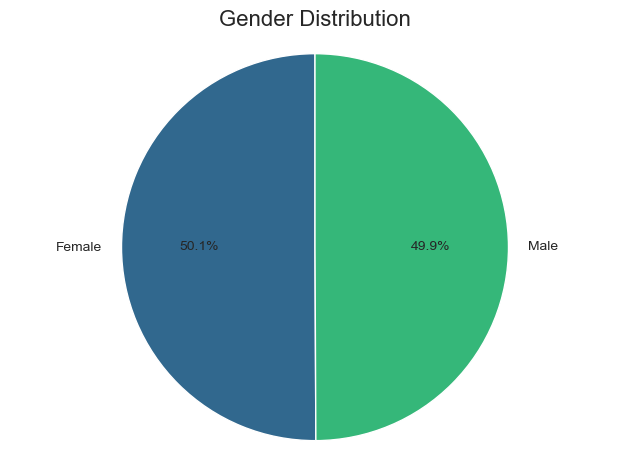

In [45]:
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(gender_counts)))
#設定浮點數與%，設定圓餅圖的顏色
plt.title('Gender Distribution', fontsize=16)
plt.axis('equal') #確定是圓形的
plt.tight_layout() #防止圖重疊
plt.show()

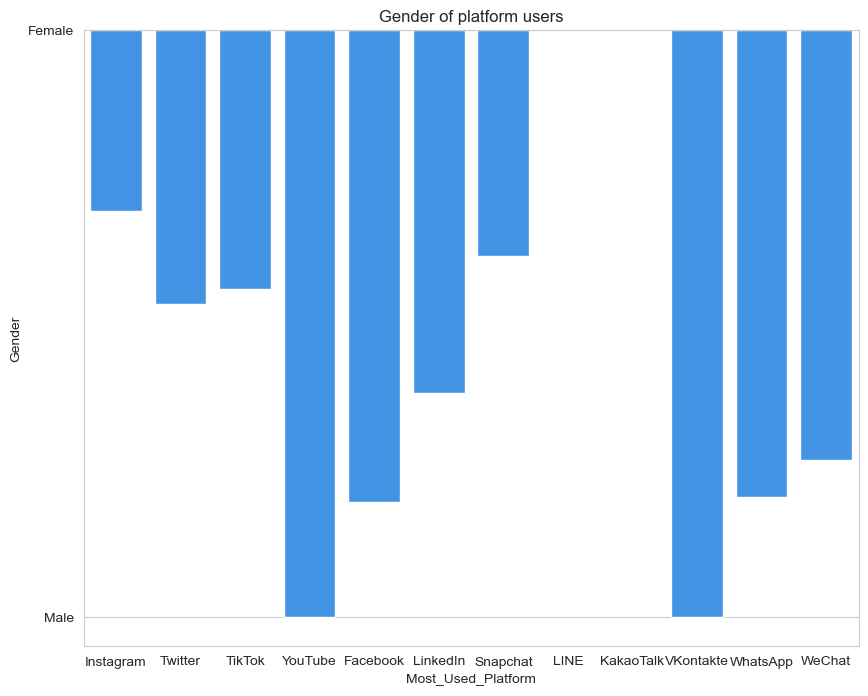

In [46]:
#性別使用的平台差異但這張圖很奇怪，所以下面區塊增加設定，平台使用量需達30以上才會計算。
plt.figure(figsize=(10, 8))# 設定圖表大小
sns.barplot(x='Most_Used_Platform', y='Gender', data=df, errorbar=None,color='#2894FF')
plt.title('Gender of platform users') # 設定圖表標題
plt.xlabel('Most_Used_Platform', fontsize=10) # 設定X軸標籤
plt.ylabel('Gender', fontsize=10) # 設定Y軸標籤
plt.show() # 顯示圖表 

In [47]:
platforms = ['Instagram', 'Twitter', 'TikTok', 'YouTube', 'Facebook', 'LinkedIn', 'Snapchat', 'LINE', 'KakaoTalk', 'VKontakte', 'WhatsApp', 'WeChat', 'Pinterest', 'Reddit', 'Telegram']
genders = ['Male', 'Female']
num_samples = 705

platform_counts = df['Most_Used_Platform'].value_counts()
print("所有平台的使用次數：")
print(platform_counts)
print("\n")

所有平台的使用次數：
Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
VKontakte     12
LINE          12
KakaoTalk     12
YouTube       10
Name: count, dtype: int64




In [48]:
min_usage_threshold = 30
common_platforms = platform_counts[platform_counts >= min_usage_threshold].index.tolist()
df_filtered = df[df['Most_Used_Platform'].isin(common_platforms)].copy() #這邊的copy可以避免使用到原先的數據
print(f"篩選後保留的平台 ({min_usage_threshold} 次以上):")
print(common_platforms)
print("\n篩選後的數據框前5行：")
print(df_filtered.head())
print("\n篩選後的總用戶數：", len(df_filtered))

篩選後保留的平台 (30 次以上):
['Instagram', 'TikTok', 'Facebook', 'WhatsApp', 'Twitter']

篩選後的數據框前5行：
   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
4           5   21    Male       Graduate      Canada                    4.5   
5           6   19  Female  Undergraduate   Australia                    7.2   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
4           Facebook                          Yes                    6.0   
5          Instagram                          Ye

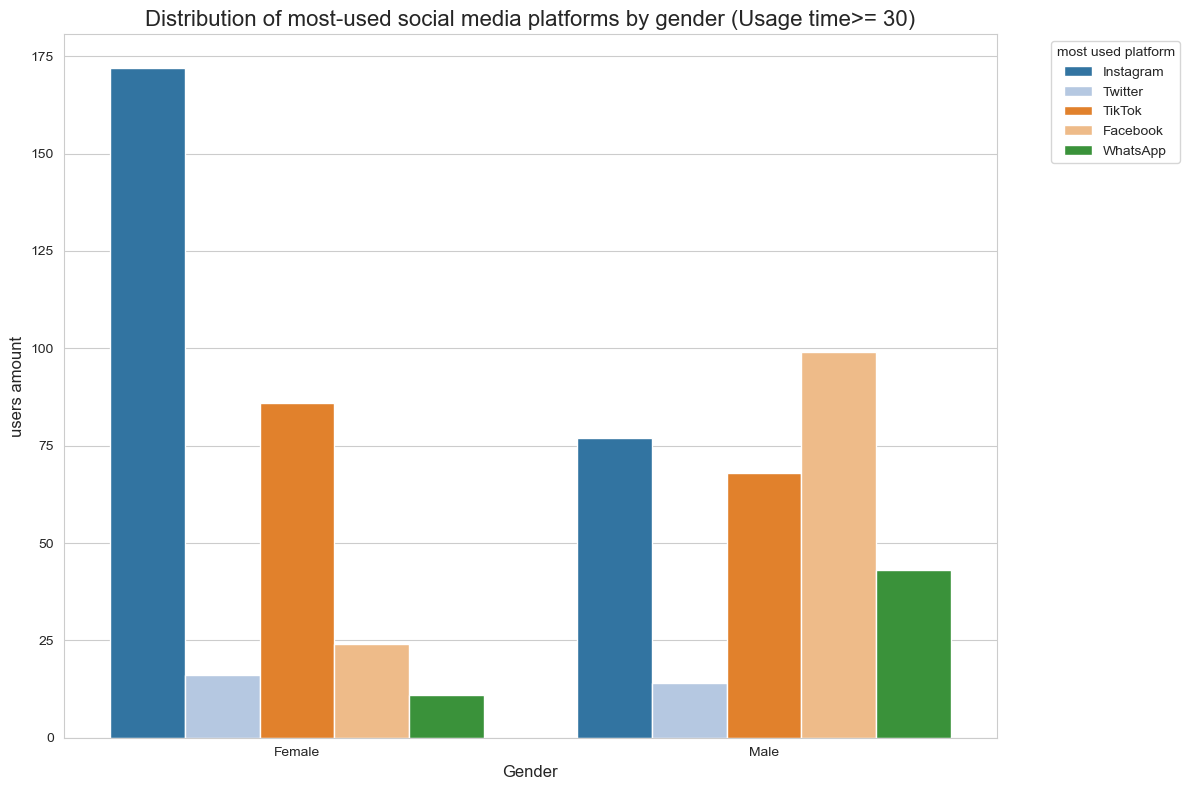

In [49]:
plt.figure(figsize=(12, 8))
# 使用篩選後的 df_filtered 數據繪圖
# palette='tab20' 在這裡仍然適用，但如果篩選後平台數量減少，也可以考慮更少的顏色
sns.countplot(data=df_filtered, x='Gender', hue='Most_Used_Platform', palette='tab20')

plt.title(f'Distribution of most-used social media platforms by gender (Usage time>= {min_usage_threshold})', fontsize=16) # 標題可以反映篩選條件
plt.xlabel('Gender', fontsize=12)
plt.ylabel('users amount', fontsize=12)
plt.legend(title='most used platform', bbox_to_anchor=(1.05, 1), loc='upper left') # 將圖例放在外面，避免遮擋
plt.tight_layout()
plt.show()